In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("zero_time_Engine_Runtime_class2_5.csv",sep=",")
df.head()

,EngineRuntime(s),Fuel_Level_Average
0,1783,58.0
1,1783,58.0
2,1968,58.8
3,2007,58.8
4,2257,57.3


In [3]:
x = df.values[:,0]
y = df.values[:,1]

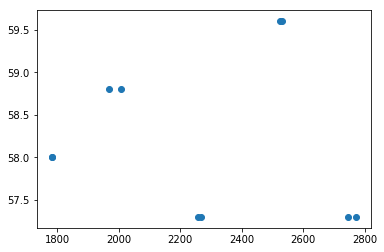

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=21,test_size=0.25)

In [6]:
print(x)
print(X_train)
print(X_test)

[ 1783.  1783.  1968.  2007.  2257.  2267.  2523.  2531.  2747.  2772.]
[ 2007.  2267.  2523.  1783.  2257.  2747.  2772.]
[ 1783.  1968.  2531.]


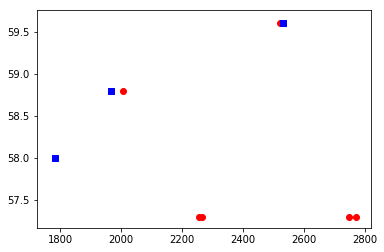

In [7]:
plt.scatter(X_train, y_train, color='r',marker='o',label='train set')
plt.scatter(X_test,y_test, color='b',marker='s',label='test set')
plt.show()

In [8]:
linReg = LinearRegression()

In [9]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)


linReg.fit(X_train,y_train)

print(linReg.coef_)
print(linReg.intercept_)

[[-0.00055318]]
[ 59.23539389]


In [10]:
y_pred = linReg.predict(X_train)
linTrainError = np.mean((y_pred - y_train)**2)
print(linTrainError)

0.698073474905


In [11]:
y_pred = linReg.predict(X_test)
linTestError = np.mean((y_pred - y_test)**2)
print(linTrainError)

0.698073474905


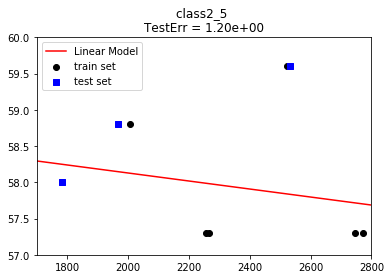

In [12]:
xval = np.linspace(1700,2800,101).reshape(-1,1)
yval = linReg.predict(xval).reshape(-1,1)

plt.plot(xval,yval,color='red',label="Linear Model")
plt.scatter(X_train, y_train, color='k',marker='o',label='train set')
plt.scatter(X_test,y_test, color='b',marker='s',label='test set')

plt.xlim((1700,2800))
plt.ylim((57,60))
plt.legend(loc="best")
plt.title("class2_5 \nTestErr = {:.2e}".format(linTestError))

plt.show()

In [13]:
float(linReg.coef_)*1700+float(linReg.intercept_)

58.29499359002311

In [14]:
float(linReg.coef_)*2800+float(linReg.intercept_)

57.6864992805128

In [15]:
-float(linReg.coef_)*1100 #감소한 Fuel Level

0.6084943095103137